### Note for question2 
- Please follow the template to complete q2
- You may create new cells to report your results and observations

In [131]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error


## P1. Create data and plot
### TODO
- implement the true function $f(x)$ defined in the write-up 
- use function name **model()**
- sample 30 random points with noise
- plot sampled points together with the model function

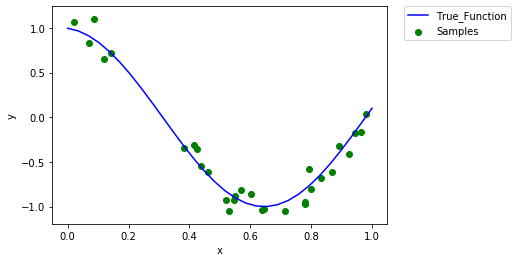

In [132]:
# Define the function to generate data points 
tx=np.linspace(0, 1, 30)
ptx=tx.reshape(-1,1)
def model(tx):
    fx=np.cos(1.5*np.pi*tx + 0.1)
    fpx=fx.reshape(-1,1) 
    return fpx
# Initialize random seed
np.random.seed(0)
# Generate noisy data points: (x,y)
x=np.random.rand(30)
x=np.sort(x)
px=x.reshape(-1,1)
noise = np.random.normal(0,0.1,30)
y=np.cos(1.5*np.pi*x + 0.1)+noise
py=y.reshape(-1,1)
# Plot true model and sampled data points
True_Func=plt.plot(ptx,model(tx),label='True_Function',color='blue')
Sample_point=plt.scatter(px,py,label='Samples',color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)



## P2. Fit a linear model
### TODO
- use sklearn to fit model: $h(x) = w_0 + w_1x$
- report $w=[w_0,w_1]$
- plot the fitted model $h(x)$ together with data points

w0 is: [0.42339533]
w1 is: [[-1.41735614]]


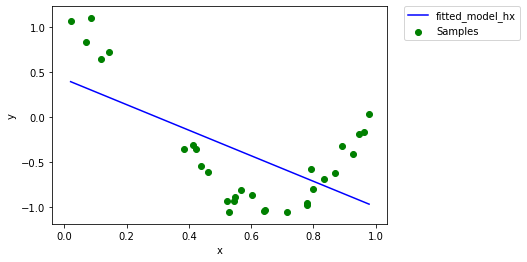

In [133]:
# Fit a linear model in the original space
regression_model = LinearRegression()
regression_model.fit(px,py)
print("w0 is:",regression_model.intercept_)
print("w1 is:",regression_model.coef_)
y_predict=regression_model.predict(px)
# Plot fitted linear model
fitted_model_hx=plt.plot(px,y_predict,label='fitted_model_hx',color='blue')
Sample_point=plt.scatter(px,py,label='Samples',color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

## P3. Fit a polynomial curve
### TODO
- augment the original feature to $[x, x^2, \cdots, x^{15}]$
- fit the polynomial curve: $h(x) = \sum_{i=0}^{15} w_i x^{i}$
- report $w=[w_0,w_1, \cdots, w_{15}]$
- plot the fitted model $h(x)$ together with data points

In [134]:
# Augment the original feature to a 15-vector
x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=15,include_bias=False)
x_poly = polynomial_features.fit_transform(px)




w0 is: [31.44465339]
[w1,w2,w3...w15] is: [[-2.98341714e+03  1.03899987e+05 -1.87416895e+06  2.03717224e+07
  -1.44873989e+08  7.09318780e+08 -2.47066977e+09  6.24564048e+09
  -1.15677067e+10  1.56895696e+10 -1.54006776e+10  1.06457788e+10
  -4.91379977e+09  1.35920330e+09 -1.70381654e+08]]


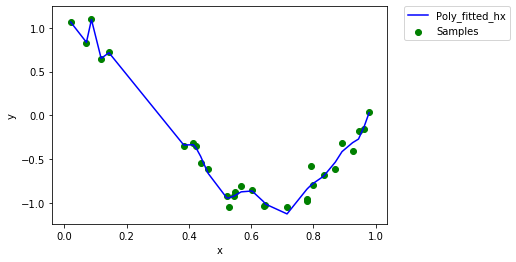

In [135]:
# Fit linear model to the generated 15-vector features

model = LinearRegression()
model.fit(x_poly, py)
y_poly_pred = model.predict(x_poly)
print("w0 is:",model.intercept_)
print("[w1,w2,w3...w15] is:",model.coef_)
# Plot fitted curve and sampled data points
Poly_Predicted=plt.plot(px,y_poly_pred,label='Poly_fitted_hx',color='blue')
Sample_point=plt.scatter(px,py,label='Samples',color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

## P4. Lasso regularization
### TODO
- use sklearn to fit a 15-degree polynomial model with L1 regularization
- report $w$
- plot the fitted model $h(x)$ together with data points

w0 is: [0.9001843]
w1 is: [-3.05548876  0.          0.          0.          0.96007811  1.37780375
  0.          0.          0.          0.          0.          0.
  0.          0.          0.        ]


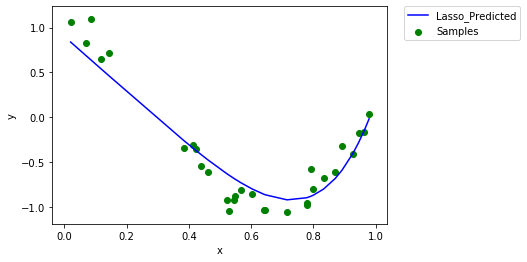

C:\Users\mohan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.17552596296404027, tolerance: 0.0012413965793982244
  positive)


w0 is: [1.20982205]
w1 is: [-3.52013776 -2.55553036  2.08654807  2.13942412  1.3846404   0.65294059
  0.12234909 -0.20035589 -0.35590052 -0.39083722 -0.34469058 -0.2474214
 -0.12016839  0.02268908  0.17163701]


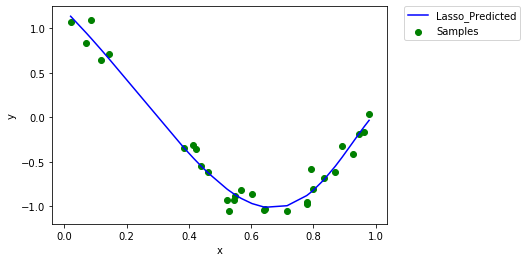

w0 is: [-0.40025914]
w1 is: [-0. -0. -0. -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


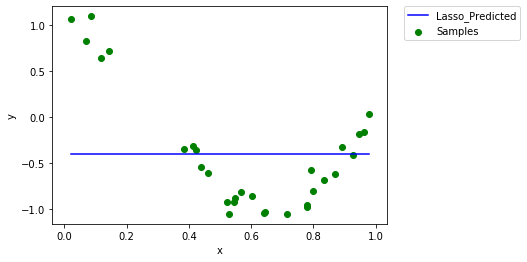

In [136]:
# Fit 15-degree polynomial with L1 regularization 
# Start with lambda(alpha) = 0.01 and max_iter = 1e4
reg1 = linear_model.Lasso(alpha=0.01)
reg1.fit(x_poly, py)  
Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=10000)
Lasso_predict1=reg1.predict(x_poly)
print("w0 is:",reg1.intercept_)
print("w1 is:",reg1.coef_)
# Plot fitted curve and sampled data points
Lasso_Predicted=plt.plot(px,Lasso_predict1,label='Lasso_Predicted',color='blue')
Sample_point=plt.scatter(px,py,label='Samples',color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

# alpha=0.00000001
reg2 = linear_model.Lasso(alpha=0.00000001)
reg2.fit(x_poly, py)  
Lasso(alpha=0.00000001, copy_X=True, fit_intercept=True, max_iter=10000)
Lasso_predict2=reg2.predict(x_poly) 
print("w0 is:",reg2.intercept_)
print("w1 is:",reg2.coef_)

# Plot fitted curve and sampled data points
Lasso_Predicted=plt.plot(px,Lasso_predict2,label='Lasso_Predicted',color='blue')
Sample_point=plt.scatter(px,py,label='Samples',color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

# alpha=2
reg2 = linear_model.Lasso(alpha=2)
reg2.fit(x_poly, py)  
Lasso(alpha=2, copy_X=True, fit_intercept=True, max_iter=10000)
Lasso_predict2=reg2.predict(x_poly) 
print("w0 is:",reg2.intercept_)
print("w1 is:",reg2.coef_)

# Plot fitted curve and sampled data points
Lasso_Predicted=plt.plot(px,Lasso_predict2,label='Lasso_Predicted',color='blue')
Sample_point=plt.scatter(px,py,label='Samples',color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

Observation :

- After reducting the value of lambda the values of weights increases. This means that the effect of regularization reduces as lambda value approaches zero

- If we increase the value of lambda the regularization leads to formation of linear model where the values of weights reaches zero 

- Thus the optimal value of lambda should be lower than start value 0.01 and closer to zero for better fit of the model

